# Gradient Descent - Logistic Regression

## Introduction
In this Jupyter notebook, we apply gradient descent to optimize a logistic regression model for the classic Titanic dataset. 
We aim to predict passenger survival based on various features like ticket class, sex, age, and more.

## Algorithm Overview

Gradient descent logistic regression is an optimization algorithm that refines the parameters of a logistic regression model, which is commonly used for binary classification problems. The logistic regression model predicts the probability of a binary outcome based on one or more predictor variables. Here are the key steps in this algorithm:

### Model Definition
We begin by defining the logistic regression model, which estimates the probability $P(Y=1|X)$ of the target variable $Y$ being in the default class ("1") given the input features $X$. The logistic function used for the prediction is given by:

$$ P(Y=1|X) = \frac{1}{1 + e^{-(b_0 + b_1X)}} $$

where:
- $b_0$ is the y-intercept or bias term.
- $b_1$ represents the coefficient for the input feature $X$.
- $e$ is the base of the natural logarithm.

The output of this function is a probability that ranges between 0 and 1.

### Cost Function
To measure how well our model fits the training data, we use the binary cross-entropy loss or log loss as the cost function:

$$ J(b_0, b_1) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(P(y^{(i)}|x^{(i)})) + (1 - y^{(i)}) \log(1 - P(y^{(i)}|x^{(i)})) \right] $$

where:
- $m$ is the number of training examples.
- $y^{(i)}$ is the actual label for the $i$-th training example.
- $P(y^{(i)}|x^{(i)})$ is the model's predicted probability that the $i$-th sample belongs to class 1.

### Gradient Descent
Gradient descent is a core part of the training process that involves iteratively adjusting the parameters $b_0$ and $b_1$ to minimize the cost function. This is done using the update rules:

$$ b_0 := b_0 - \alpha \frac{\partial J}{\partial b_0} $$
$$ b_1 := b_1 - \alpha \frac{\partial J}{\partial b_1} $$

where $\alpha$ is the learning rate, which controls the size of the steps we take towards the minimum of the cost function.

### Partial Derivatives
The gradients of the cost function with respect to the model parameters are computed as follows:

$$ \frac{\partial J}{\partial b_0} = \frac{1}{m} \sum_{i=1}^{m} (P(y^{(i)}|x^{(i)}) - y^{(i)}) $$
$$ \frac{\partial J}{\partial b_1} = \frac{1}{m} \sum_{i=1}^{m} (P(y^{(i)}|x^{(i)}) - y^{(i)}) x^{(i)} $$

These partial derivatives represent the slopes of the cost function at any point and direct the update step towards the minimum.

### Updating the Parameters
We apply the update rules repeatedly for a number of iterations or until the changes to $b_0$ and $b_1$ are below a certain threshold, indicating convergence.

### Prediction
Once the model parameters are optimized, for a new set of input features, the model predicts the binary outcome (1 or 0). The decision rule is:

- If $P(Y=1|X) > 0.5$, predict class "1".
- If $P(Y=1|X) \leq 0.5$, predict class "0".

### Limitations and Assumptions
While gradient descent logistic regression is effective for binary classification tasks, it assumes a linear relationship between the log odds of the outcome and the input features. The model can also be sensitive to outliers, which can disproportionately influence the position of the decision boundary.

This detailed explanation outlines the theoretical underpinnings of logistic regression optimized by gradient descent, providing a foundation for its application to practical classification problems.

## Implementation
Below, we load the Titanic dataset, preprocess it, and apply logistic regression using gradient descent to predict survival.

In [40]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the dataset
df = sns.load_dataset('titanic')

# Drop columns with high missing values and irrelevant information
df.drop(columns=['deck', 'embark_town', 'alive'], inplace=True)

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Handle missing values by imputation
df.fillna(df.mean(), inplace=True)

# Display the first few rows of the processed dataframe
print(df.head())

   survived  pclass   age  sibsp  parch     fare  adult_male  alone  sex_male  \
0         0       3  22.0      1      0   7.2500        True  False         1   
1         1       1  38.0      1      0  71.2833       False  False         0   
2         1       3  26.0      0      0   7.9250       False   True         0   
3         1       1  35.0      1      0  53.1000       False  False         0   
4         0       3  35.0      0      0   8.0500        True   True         1   

   embarked_Q  embarked_S  class_Second  class_Third  who_man  who_woman  
0           0           1             0            1        1          0  
1           0           0             0            0        0          1  
2           0           1             0            1        0          1  
3           0           1             0            0        0          1  
4           0           1             0            1        1          0  


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Prepare features and labels
X = df.drop('survived', axis=1)
y = df['survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression pipeline with preprocessing
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='saga', max_iter=1000))
])

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='saga'))])

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{report}')

Accuracy: 0.8156424581005587
Confusion Matrix:
[[92 13]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



Accuracy: 0.8156424581005587
Confusion Matrix:
[[92 13]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



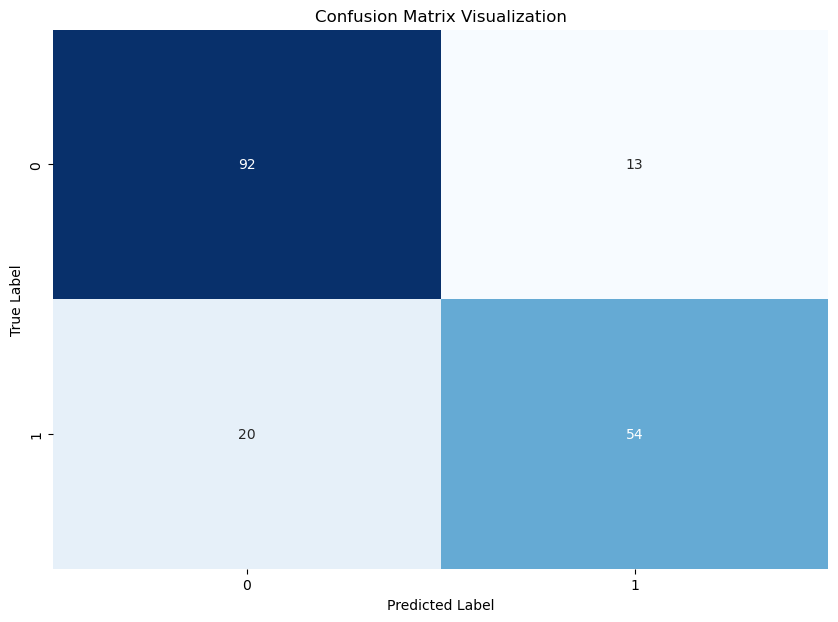

In [43]:
import matplotlib.pyplot as plt

# Assuming 'pipeline' is already fitted and 'X_test', 'y_test' are defined
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Visualization')
plt.show()

## Conclusion

### Model Performance
Our logistic regression model achieved an accuracy of approximately 81.56% on the test dataset. This is a robust starting point, considering the simplicity of the model and the complexity of human survival factors during the Titanic disaster.

### Confusion Matrix Insights
The confusion matrix visualized above offers deeper insights:

- True Negative (TN): 92 passengers were correctly predicted not to survive.
- False Positive (FP): 13 passengers were incorrectly predicted to survive.
- False Negative (FN): 20 passengers were incorrectly predicted not to survive.
- True Positive (TP): 54 passengers were correctly predicted to survive.

The model shows a higher number of true negatives than true positives, indicating a slightly better performance in predicting non-survival. The lower number of false negatives compared to false positives suggests that the model is more conservative in predicting survival, potentially an artifact of the underlying class distribution.

### Classification Report Analysis
The classification report gives us the following metrics:

- **Precision for Non-Survivors (0)**: Out of all predictions for non-survival, 82% were correct.
- **Recall for Non-Survivors (0)**: Out of all actual non-survivors, the model correctly identified 88%.
- **F1-Score for Non-Survivors (0)**: The F1-score, a balance between precision and recall, is 85% for non-survivors.

Similarly, for survivors (1):

- **Precision for Survivors (1)**: Out of all predictions for survival, 81% were correct.
- **Recall for Survivors (1)**: The model correctly identified 73% of all actual survivors.
- **F1-Score for Survivors (1)**: The F1-score for survivors is 77%.

The model demonstrates a balanced performance across both classes with a slight inclination towards correctly identifying non-survivors.

### Implications and Future Work
This model serves as a preliminary step in predictive analytics for binary classification problems. It is apparent that there is room for improvement, especially in reducing the number of false positives and false negatives. Future work might involve:

- Feature engineering to better capture the underlying patterns in the data.
- Hyperparameter tuning of the logistic regression model.
- Experimenting with more complex models like Random Forests or Gradient Boosted Trees.
- Applying class-weight adjustments to handle imbalances in the dataset.
- Utilizing cross-validation to ensure the model's generalizability to new data.

In conclusion, the results obtained provide valuable predictions about survival on the Titanic, showcasing the power of logistic regression when combined with gradient descent optimization. With further refinement, the predictive performance can likely be improved, leading to more accurate and insightful results.